# Danny's Dinner

In [1]:
!pip install pandasql
import pandas as pd
import pandasql

from pandasql import sqldf 
sql_run = lambda q: sqldf(q, globals())

In [2]:
sales = pd.read_csv('https://raw.githubusercontent.com/dhykac/8_Week_SQL_Challenge/main/Week%201%20-%20Danny%20Dinner/sales.csv', sep = ',', encoding = 'latin-1')
menu = pd.read_csv('https://raw.githubusercontent.com/dhykac/8_Week_SQL_Challenge/main/Week%201%20-%20Danny%20Dinner/menu.csv', sep = ',', encoding = 'latin-1')
members = pd.read_csv('https://raw.githubusercontent.com/dhykac/8_Week_SQL_Challenge/main/Week%201%20-%20Danny%20Dinner/members.csv', sep = ',', encoding = 'latin-1')

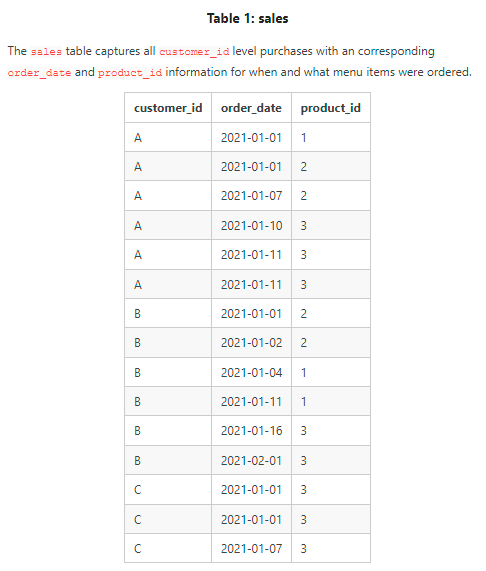

In [3]:
sales

,customer_id,order_date,product_id
0,A,2021-01-01,1
1,A,2021-01-01,2
2,A,2021-01-07,2
3,A,2021-01-10,3
4,A,2021-01-11,3
5,A,2021-01-11,3
6,B,2021-01-01,2
7,B,2021-01-02,2
8,B,2021-01-04,1
9,B,2021-01-11,1


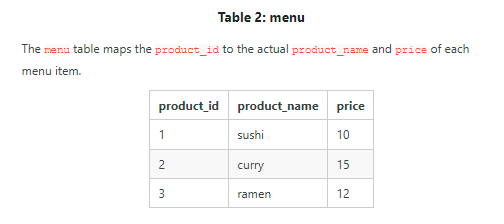

In [4]:
menu

,product_id,product_name,price
0,1,sushi,10
1,2,curry,15
2,3,ramen,12


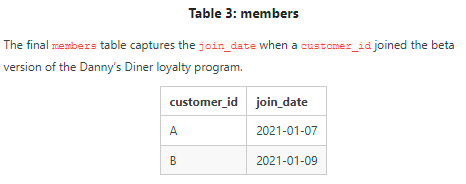

In [5]:
members

,customer_id,join_date
0,A,2021-01-07
1,B,2021-01-09


Each of the following case study questions can be answered using a single SQL statement:

1. What is the total amount each customer spent at the restaurant?
2. How many days has each customer visited the restaurant?
3. What was the first item from the menu purchased by each customer?
4. What is the most purchased item on the menu and how many times was it purchased by all customers?
5. Which item was the most popular for each customer?
6. Which item was purchased first by the customer after they became a member?
7. Which item was purchased just before the customer became a member?
8. What is the total items and amount spent for each member before they became a member?
9. If each $1 spent equates to 10 points and sushi has a 2x points multiplier - how many points would each customer have?
10. In the first week after a customer joins the program (including their join date) they earn 2x points on all items, not just sushi - how many points do customer A and B have at the end of January?

In [6]:
# What is the total amount each customer spent at the restaurant?
number1 = """
select customer_id, sum(mn.price) total_spent
from menu mn
left join sales sls using(product_id)
group by customer_id
order by customer_id asc
"""

sql_run(number1)

,customer_id,total_spent
0,A,76
1,B,74
2,C,36


In [7]:
# How many days has each customer visited the restaurant?
number2 = """
select customer_id, count(distinct order_date) day_visit
from sales
group by customer_id
order by customer_id asc
"""

sql_run(number2)

,customer_id,day_visit
0,A,4
1,B,6
2,C,2


In [8]:
# What was the first item from the menu purchased by each customer?
number3 = """
with base as (
select customer_id, order_date, product_id, mn.product_name, rank() over(partition by customer_id order by order_date asc) order_no
from sales
left join menu mn using(product_id)
order by 1,2
)

select customer_id, product_name, order_no
from base
where order_no = 1
group by 1,2
"""

sql_run(number3)

,customer_id,product_name,order_no
0,A,curry,1
1,A,sushi,1
2,B,curry,1
3,C,ramen,1


In [9]:
# What is the most purchased item on the menu and how many times was it purchased by all customers?
number4 = """
with base as (
select customer_id, order_date, product_id, mn.product_name
from sales
left join menu mn using(product_id)
order by 1,2
)

select product_name, count(*) as order_count
from base
group by product_name
order by order_count desc
"""
sql_run(number4)

,product_name,order_count
0,ramen,8
1,curry,4
2,sushi,3


In [10]:
# What was the first item from the menu purchased by each customer?
number3 = """
with base as (
select customer_id, order_date, product_id, mn.product_name, rank() over(partition by customer_id order by order_date asc) order_no
from sales
left join menu mn using(product_id)
order by 1,2
)

select customer_id, product_name first_order
from base
where order_no = 1
group by 1,2
"""

sql_run(number3)

,customer_id,first_order
0,A,curry
1,A,sushi
2,B,curry
3,C,ramen


In [11]:
# Which item was the most popular for each customer?
number5 = """
with base as (
select customer_id, mn.product_name, count(*) order_count, rank() over(partition by customer_id order by count(*) desc) popularity_rank
from sales
left join menu mn using(product_id)
group by 1,2
)

select customer_id, product_name, order_count
from base
where popularity_rank = 1

"""
sql_run(number5)

,customer_id,product_name,order_count
0,A,ramen,3
1,B,sushi,2
2,B,ramen,2
3,B,curry,2
4,C,ramen,3


In [12]:
# Which item was purchased first by the customer after they became a member?
# What was the first item from the menu purchased by each customer?
number6 = """
with order_after_member as (
select customer_id, mb.join_date, order_date, product_id, mn.product_name, rank() over(partition by customer_id order by order_date asc) order_no
from sales
left join members mb using(customer_id)
left join menu mn using(product_id)
where join_date < order_date
or join_date is NULL
)

select customer_id, join_date, order_date, product_name, order_no
from order_after_member
where order_no = 1
group by 1,4
"""

sql_run(number6)

,customer_id,join_date,order_date,product_name,order_no
0,A,2021-01-07,2021-01-10,ramen,1
1,B,2021-01-09,2021-01-11,sushi,1
2,C,None,2021-01-01,ramen,1


In [13]:
# Which item was purchased just before the customer became a member?
number7 = """
with order_before_member as (
select customer_id, mb.join_date, order_date, product_id, mn.product_name, rank() over(partition by customer_id order by order_date asc) order_no
from sales
left join members mb using(customer_id)
left join menu mn using(product_id)
where join_date > order_date
or join_date is NULL
)

select customer_id, product_name, order_no, max(order_no) as order_no_before_member
from order_before_member
group by 1
order by 1
"""
sql_run(number7)

,customer_id,product_name,order_no,order_no_before_member
0,A,sushi,1,1
1,B,sushi,3,3
2,C,ramen,3,3


In [14]:
# What is the total items and amount spent for each member before they became a member?
number8 = """
with order_before_member as (
select customer_id, mb.join_date, order_date, product_id, mn.product_name, count(product_name) item_buy, sum(mn.price) amount_spent
from sales
left join members mb using(customer_id)
left join menu mn using(product_id)
where join_date > order_date
or join_date is NULL
group by 1,4
)

select customer_id, sum(item_buy) total_item_buy_beforemember, sum(amount_spent) total_amount_spent_beforemember
from order_before_member
group by 1

"""
sql_run(number8)

,customer_id,total_item_buy_beforemember,total_amount_spent_beforemember
0,A,2,25
1,B,3,40
2,C,3,36


In [15]:
# If each $1 spent equates to 10 points and sushi has a 2x points multiplier - how many points would each customer have?
number9 = """
with base as (
select customer_id, product_id, mn.product_name, sum(mn.price) amount_spent, case 
when mn.product_name = 'sushi' then sum(mn.price)*2
when mn.product_name = 'curry' then sum(mn.price)*1
when mn.product_name = 'ramen' then sum(mn.price)*1
end points_earned
from sales
left join menu mn using(product_id)
group by 1,2
)

select customer_id, sum(points_earned) total_points
from base
group by 1

"""
sql_run(number9)

,customer_id,total_points
0,A,86
1,B,94
2,C,36


In [16]:
# In the first week after a customer joins the program (including their join date) they earn 2x points on all items, not just sushi - how many points do customer A and B have at the end of January?
number10 = """
with base as (
select customer_id, mb.join_date, order_date, strftime('%m', order_date) month, product_id, mn.product_name, count(mn.product_name) total_buy, case 
when mn.product_name = 'sushi' and order_date between date(join_date, '-01 days') and date(join_date, '07 days') then sum(mn.price)*4
when mn.product_name = 'curry' and order_date between date(join_date, '-01 days') and date(join_date, '07 days') then sum(mn.price)*2
when mn.product_name = 'ramen' and order_date between date(join_date, '-01 days') and date(join_date, '07 days') then sum(mn.price)*2
when mn.product_name = 'sushi' and order_date not between date(join_date, '-01 days') and date(join_date, '07 days') then sum(mn.price)*2
when mn.product_name = 'curry' and order_date not between date(join_date, '-01 days') and date(join_date, '07 days') then sum(mn.price)*1
when mn.product_name = 'ramen' and order_date not between date(join_date, '-01 days') and date(join_date, '07 days') then sum(mn.price)*1
end points_earned
from sales
left join members mb using(customer_id)
left join menu mn using(product_id)
where join_date is not NULL
group by 1,3,4
order by 1,3,4
)

select customer_id, sum(points_earned) final_points
from base
where month = '01'
group by customer_id
"""

sql_run(number10)

,customer_id,final_points
0,A,152
1,B,114


In [17]:
# In the first week after a customer joins the program (including their join date) they earn 2x points on all items, not just sushi - how many points do customer A and B have at the end of January?
bonus1 = """
select customer_id, order_date, mn.product_name, mn.price, case 
when join_date <= order_date then "Y"
else "N"
end members
from sales
left join members mb using(customer_id)
left join menu mn using(product_id)
"""
sql_run(bonus1)

,customer_id,order_date,product_name,price,members
0,A,2021-01-01,sushi,10,N
1,A,2021-01-01,curry,15,N
2,A,2021-01-07,curry,15,Y
3,A,2021-01-10,ramen,12,Y
4,A,2021-01-11,ramen,12,Y
5,A,2021-01-11,ramen,12,Y
6,B,2021-01-01,curry,15,N
7,B,2021-01-02,curry,15,N
8,B,2021-01-04,sushi,10,N
9,B,2021-01-11,sushi,10,Y


In [18]:
# In the first week after a customer joins the program (including their join date) they earn 2x points on all items, not just sushi - how many points do customer A and B have at the end of January?
bonus2 = """
with base as (
select customer_id, order_date, mn.product_name, mn.price, case 
when join_date <= order_date then "Y"
else "N"
end members, case
when join_date <= order_date then dense_rank() over(partition by customer_id, (case when join_date <= order_date then 1 else 0 end) order by order_date asc)
else "null"
end ranking
from sales
left join members mb using(customer_id)
left join menu mn using(product_id)
)

select *
from base
order by 1,2
"""
sql_run(bonus2)

,customer_id,order_date,product_name,price,members,ranking
0,A,2021-01-01,sushi,10,N,null
1,A,2021-01-01,curry,15,N,null
2,A,2021-01-07,curry,15,Y,1
3,A,2021-01-10,ramen,12,Y,2
4,A,2021-01-11,ramen,12,Y,3
5,A,2021-01-11,ramen,12,Y,3
6,B,2021-01-01,curry,15,N,null
7,B,2021-01-02,curry,15,N,null
8,B,2021-01-04,sushi,10,N,null
9,B,2021-01-11,sushi,10,Y,1
